### Import packages

In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir

### Listar arquivos

In [3]:
# list all path's files
def listar_arquivos(path=None):
    if path == None:
        return 0

    files = [f for f in listdir(path)]
    return files

### Get data

In [4]:
def get_data(results_file):
    results = []
    counter = 0
    for line in results_file:
        counter += 1
        if counter%3==0:
            results.append(int(line));
    return results

In [16]:
cachorro = []
random = []

for puzzlesize in range(3, 9):
    cachorro_file = open("cachorro/cachorro_a10_p"+str(puzzlesize)+".txt", "r");
    cachorro.append(get_data(cachorro_file))
    random_file = open("random/random_a10_p"+str(puzzlesize)+".txt", "r");
    random.append(get_data(random_file))

In [17]:
print(cachorro)

[[13, 22, 23, 3, 7, 17, 18, 8, 7, 24, 12, 11, 25, 16, 7, 12, 9, 19, 6, 18, 7, 18, 9, 12, 8, 9, 21, 12, 10, 8, 10, 9, 14, 14, 8, 14, 24, 28, 9, 15, 19, 10, 10, 6, 21, 38, 6, 6, 24, 18, 6, 4, 24, 15, 14, 17, 22, 9, 10, 18, 17, 6, 20, 19, 11, 6, 7, 4, 6, 27, 9, 14, 13, 11, 5, 9, 20, 22, 7, 15, 8, 15, 6, 14, 9, 11, 40, 13, 32, 11, 14, 6, 3, 17, 12, 18, 10, 23, 10, 19], [7, 27, 18, 16, 17, 21, 11, 21, 17, 20, 24, 19, 16, 23, 13, 18, 12, 12, 22, 32, 39, 23, 27, 14, 12, 9, 16, 17, 11, 20, 24, 41, 13, 13, 18, 18, 26, 31, 11, 17, 10, 7, 23, 11, 32, 15, 13, 15, 11, 11, 47, 9, 13, 35, 10, 17, 9, 25, 16, 9, 13, 27, 17, 17, 28, 31, 15, 38, 16, 11, 31, 30, 25, 33, 14, 13, 16, 9, 24, 19, 15, 8, 20, 24, 16, 20, 28, 14, 14, 22, 20, 8, 19, 10, 17, 28, 23, 10, 22, 10], [29, 52, 51, 19, 21, 12, 17, 16, 45, 33, 20, 34, 20, 21, 38, 35, 22, 18, 17, 30, 12, 26, 17, 24, 24, 20, 35, 19, 24, 11, 21, 35, 20, 7, 21, 22, 32, 35, 9, 17, 23, 14, 35, 40, 34, 38, 22, 26, 25, 13, 29, 13, 21, 19, 32, 30, 33, 25, 48, 25, 

In [18]:
print(random)

[[472, 263, 669, 130, 626, 175, 262, 8, 30, 386, 688, 197, 157, 16, 276, 320, 33, 101, 661, 279, 272, 710, 519, 651, 682, 382, 155, 432, 231, 306, 703, 491, 198, 111, 214, 413, 677, 529, 295, 502, 83, 225, 99, 32, 713, 266, 427, 44, 684, 138, 305, 592, 359, 539, 90, 151, 450, 376, 47, 406, 59, 126, 634, 637, 571, 425, 423, 380, 448, 562, 635, 118, 533, 615, 605, 141, 258, 83, 257, 334, 44, 215, 454, 172, 462, 313, 239, 386, 528, 376, 70, 126, 687, 571, 161, 74, 187, 618, 155, 200], [302, 3790, 3952, 4816, 1686, 2635, 1578, 2990, 2804, 1984, 4342, 1438, 3568, 1687, 44, 315, 2449, 1917, 2208, 674, 2384, 4020, 2034, 353, 1299, 2628, 4242, 4704, 2819, 1754, 2810, 1921, 3676, 1620, 3959, 3815, 1812, 2159, 1472, 1160, 188, 291, 1174, 3113, 2940, 3055, 4772, 1509, 4999, 3748, 4693, 2567, 2701, 3747, 310, 2396, 4810, 2665, 1154, 1599, 339, 2590, 4507, 3944, 2545, 249, 687, 2392, 2767, 4772, 547, 2459, 2633, 3235, 2873, 529, 476, 1750, 4217, 1106, 805, 3106, 383, 3704, 3054, 1831, 1977, 3623, 3

### Analyses the results

In [19]:
random_data = pd.Series(random[2])
random_data.describe()

count      100.000000
mean     14087.350000
std       8450.389741
min        397.000000
25%       6136.250000
50%      15114.500000
75%      19874.000000
max      29998.000000
dtype: float64

In [20]:
cachorro_data = pd.Series(cachorro[2])
cachorro_data.describe()

count    100.000000
mean      25.090000
std        9.160847
min        7.000000
25%       19.000000
50%       24.000000
75%       32.000000
max       52.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

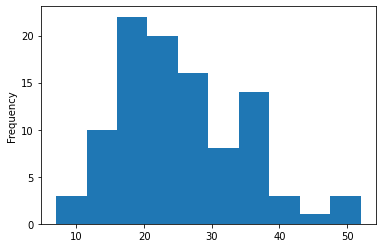

In [21]:
cachorro_data.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

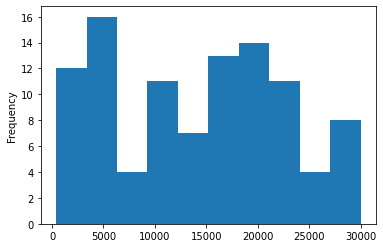

In [22]:
random_data.plot.hist()

In [23]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    print(h)
    return m, m-h, m+h

In [26]:
media_cachorro, minimo_cachorro, maximo_cachorro = mean_confidence_interval(cachorro[2], confidence=0.98)

2.166179165414402


In [27]:
print(media_cachorro)
print(minimo_cachorro)
print(maximo_cachorro)

25.09
22.923820834585598
27.2561791654144


In [28]:
media, minimo, maximo = mean_confidence_interval(random[2], confidence=0.98)

1998.1841113050605


In [29]:
print(media)
print(minimo)
print(maximo)

14087.35
12089.16588869494
16085.53411130506


In [30]:
print(minimo/maximo_cachorro)

443.53853910804145


### Mean

In [38]:
# mean
cachorro_x = []
random_x = []
# puzzlesize
cachorro_y = []
random_y = []

for i in range(6):    
    cachorro_y.append(sum(cachorro[i])/len(cachorro[i]))
    cachorro_x.append(i+3)
    random_y.append(sum(random[i])/len(random[i]))
    random_x.append(i+3)

In [42]:
print(cachorro_y)

[13.72, 18.79, 25.09, 34.93, 49.11, 73.89]


In [43]:
print(random_y)

[341.3, 2400.14, 14087.35, 82027.0, 272255.82, 943508.24]


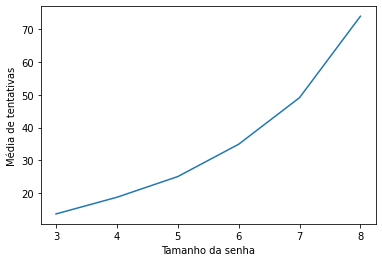

In [57]:
plt.plot(cachorro_x, cachorro_y)
plt.xlabel('Tamanho da senha')
plt.ylabel('Média de tentativas')
plt.savefig('cachorro.png')
plt.show()

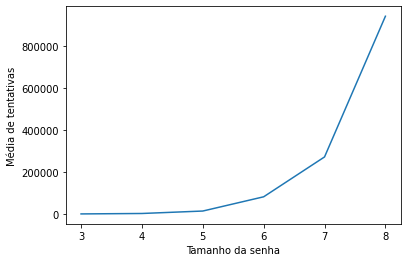

In [58]:
plt.plot(random_x, random_y)
plt.xlabel('Tamanho da senha')
plt.ylabel('Média de tentativas')
plt.savefig('random.png')
plt.show()